In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image
import os



In [8]:

# Function to load the image
def load_image(image_path):
    img = Image.open(image_path)
    img_gray = img.convert('L')  # Convert to grayscale
    img_rgb = np.array(img)  # Convert to RGB
    img_matrix = np.array(img_gray)  # Convert to grayscale matrix
    return img_rgb, img_matrix



In [9]:
# EDA on the image
def image_eda(image_rgb, image_gray):
    # Display original images (RGB and Grayscale)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original RGB Image')

    plt.subplot(1, 2, 2)
    plt.imshow(image_gray, cmap='gray')
    plt.title('Grayscale Image')

    plt.show()


In [10]:

# Function to apply PCA to the grayscale image
def apply_pca(image_matrix, num_components):
    image_matrix_normalized = image_matrix / 255.0  # Normalize to [0, 1]
    pca = PCA(n_components=num_components)
    pca_transformed = pca.fit_transform(image_matrix_normalized)
    reconstructed = pca.inverse_transform(pca_transformed)
    return reconstructed * 255.0  # Scale back to [0, 255]


In [11]:

# Compare different components and show results
def compare_components(image_matrix, components_list):
    plt.figure(figsize=(12, 6))
    for i, num_components in enumerate(components_list):
        reconstructed_image = apply_pca(image_matrix, num_components)
        plt.subplot(1, len(components_list), i + 1)
        plt.imshow(reconstructed_image, cmap='gray')
        plt.title(f'{num_components} Components')

    plt.show()


In [12]:

# Select optimal components based on visual inspection
def select_optimal_components(image_matrix):
    components_list = [10, 20, 50, 100, 150]  # List of component numbers to test
    compare_components(image_matrix, components_list)
    optimal_components = int(input("Enter the number of components that best matches the grayscale image: "))
    return optimal_components


In [13]:

# Reconstruct the RGB image using compressed grayscale
def reconstruct_rgb_image(image_rgb, compressed_gray):
    compressed_rgb = np.zeros_like(image_rgb)  # Placeholder for compressed RGB image
    for i in range(3):  # For each channel (R, G, B), apply the compressed grayscale
        compressed_rgb[:, :, i] = compressed_gray
    return compressed_rgb


In [14]:

# Main function to execute the process
def compress_image(image_path):
    # Load the image
    image_rgb, image_gray = load_image(image_path)

    # Perform EDA
    image_eda(image_rgb, image_gray)

    # Select optimal number of components based on comparison
    optimal_components = select_optimal_components(image_gray)

    # Compress the image using optimal components
    compressed_gray = apply_pca(image_gray, optimal_components)

    # Reconstruct the compressed image in RGB format
    compressed_rgb = reconstruct_rgb_image(image_rgb, compressed_gray)

    # Display the compressed RGB image
    plt.figure(figsize=(6, 6))
    plt.imshow(compressed_rgb)
    plt.title(f'Compressed RGB Image with {optimal_components} Components')
    plt.show()


In [15]:

# Set the image path
image_path = r'D:\Documents\DDU\DDU Sem 7\ML_DL\Labs\Image.jpeg'


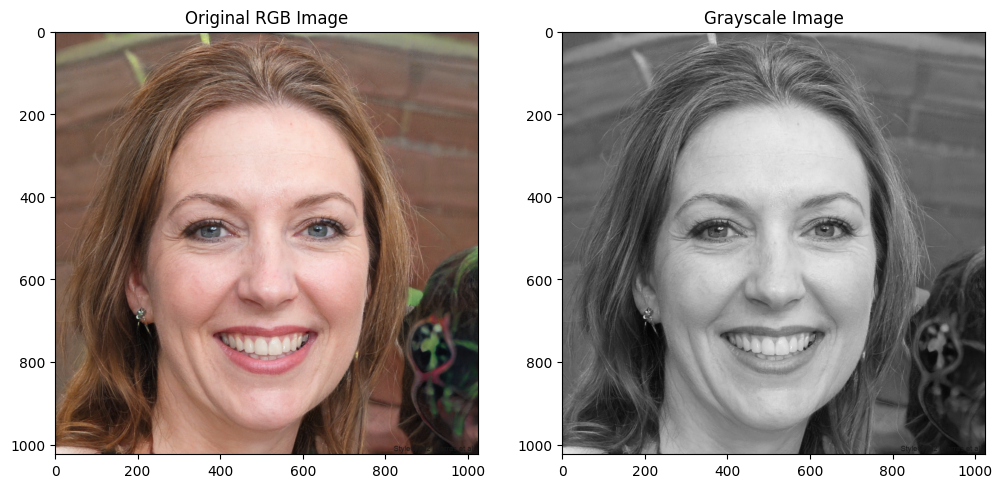

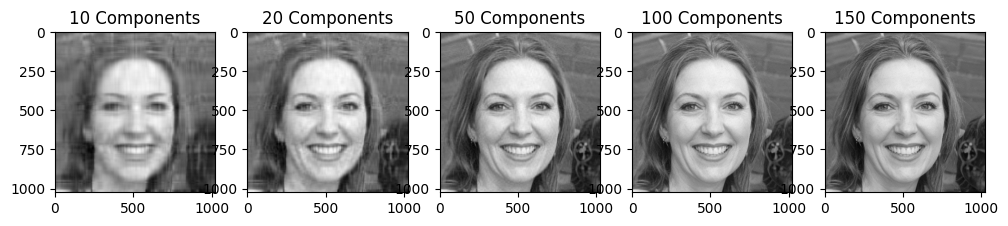

Enter the number of components that best matches the grayscale image:  50


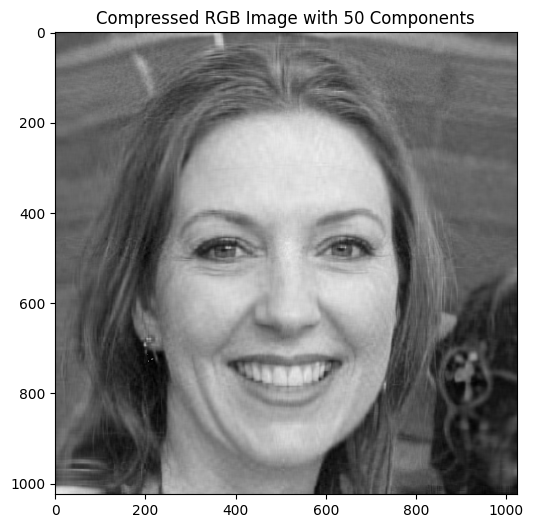

In [16]:

# Call the main function to compress and display the image
compress_image(image_path)